In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [113]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)

#### <font color='darkorange'>Remove pre-illuminated trials

In [114]:
below15 = below15[(below15['stim_condition'].between(0,1))|(below15['stim_condition']==3)]
below15['stim_condition'].unique()

array([1, 3, 0], dtype=int64)

In [115]:
counts=below15.groupby(['group','stim_condition']).count()['session']
counts

group  stim_condition
CTRL   0                  954
       1                  808
       3                  937
NPHR   0                 1196
       1                 1192
       3                 1164
Name: session, dtype: int64

#### <font color='darkorange'> Add session number to sessions

In [116]:
# Add session numbers to each session timestamp
below15= below15.groupby(['group', 'rat']).apply(add_session_nr).reset_index(drop=True)

In [117]:
perfs_and_median_lats = below15.groupby(['group','session','stim_condition']).apply(
    calc_performance_and_median_latencies_in_group
)

In [118]:
perfs_and_median_lats.drop(['session', 'run_nr', 'start_timestamp','run_type', 'stim_condition', 
                            'group', 'cp_entry_timestamp', 'cp_entry_timestamp','cp_exit_timestamp', 
                            'latency_to_cp_exit', 'latency_to_cp_entry'], axis=1, inplace=True)

In [119]:
perfs_and_median_lats.reset_index(inplace=True)
perfs_and_median_lats=perfs_and_median_lats[perfs_and_median_lats['session_nr']<=15]
perfs_and_median_lats.head(3)

,group,session,stim_condition,level_3,rat,outcome,time_in_cp,session_nr,performance,median_latency_to_cp,median_time_in_cp
0,CTRL,2020-02-07T14_40_27,0,244,CTRL2,1.0,0.493171,1.0,50.000000,3.637888,1.089165
1,CTRL,2020-02-07T14_40_27,3,243,CTRL2,1.0,0.861824,1.0,71.428571,3.343014,0.566349
2,CTRL,2020-02-08T10_24_17,0,260,CTRL2,1.0,0.460954,2.0,71.428571,1.854938,0.532032


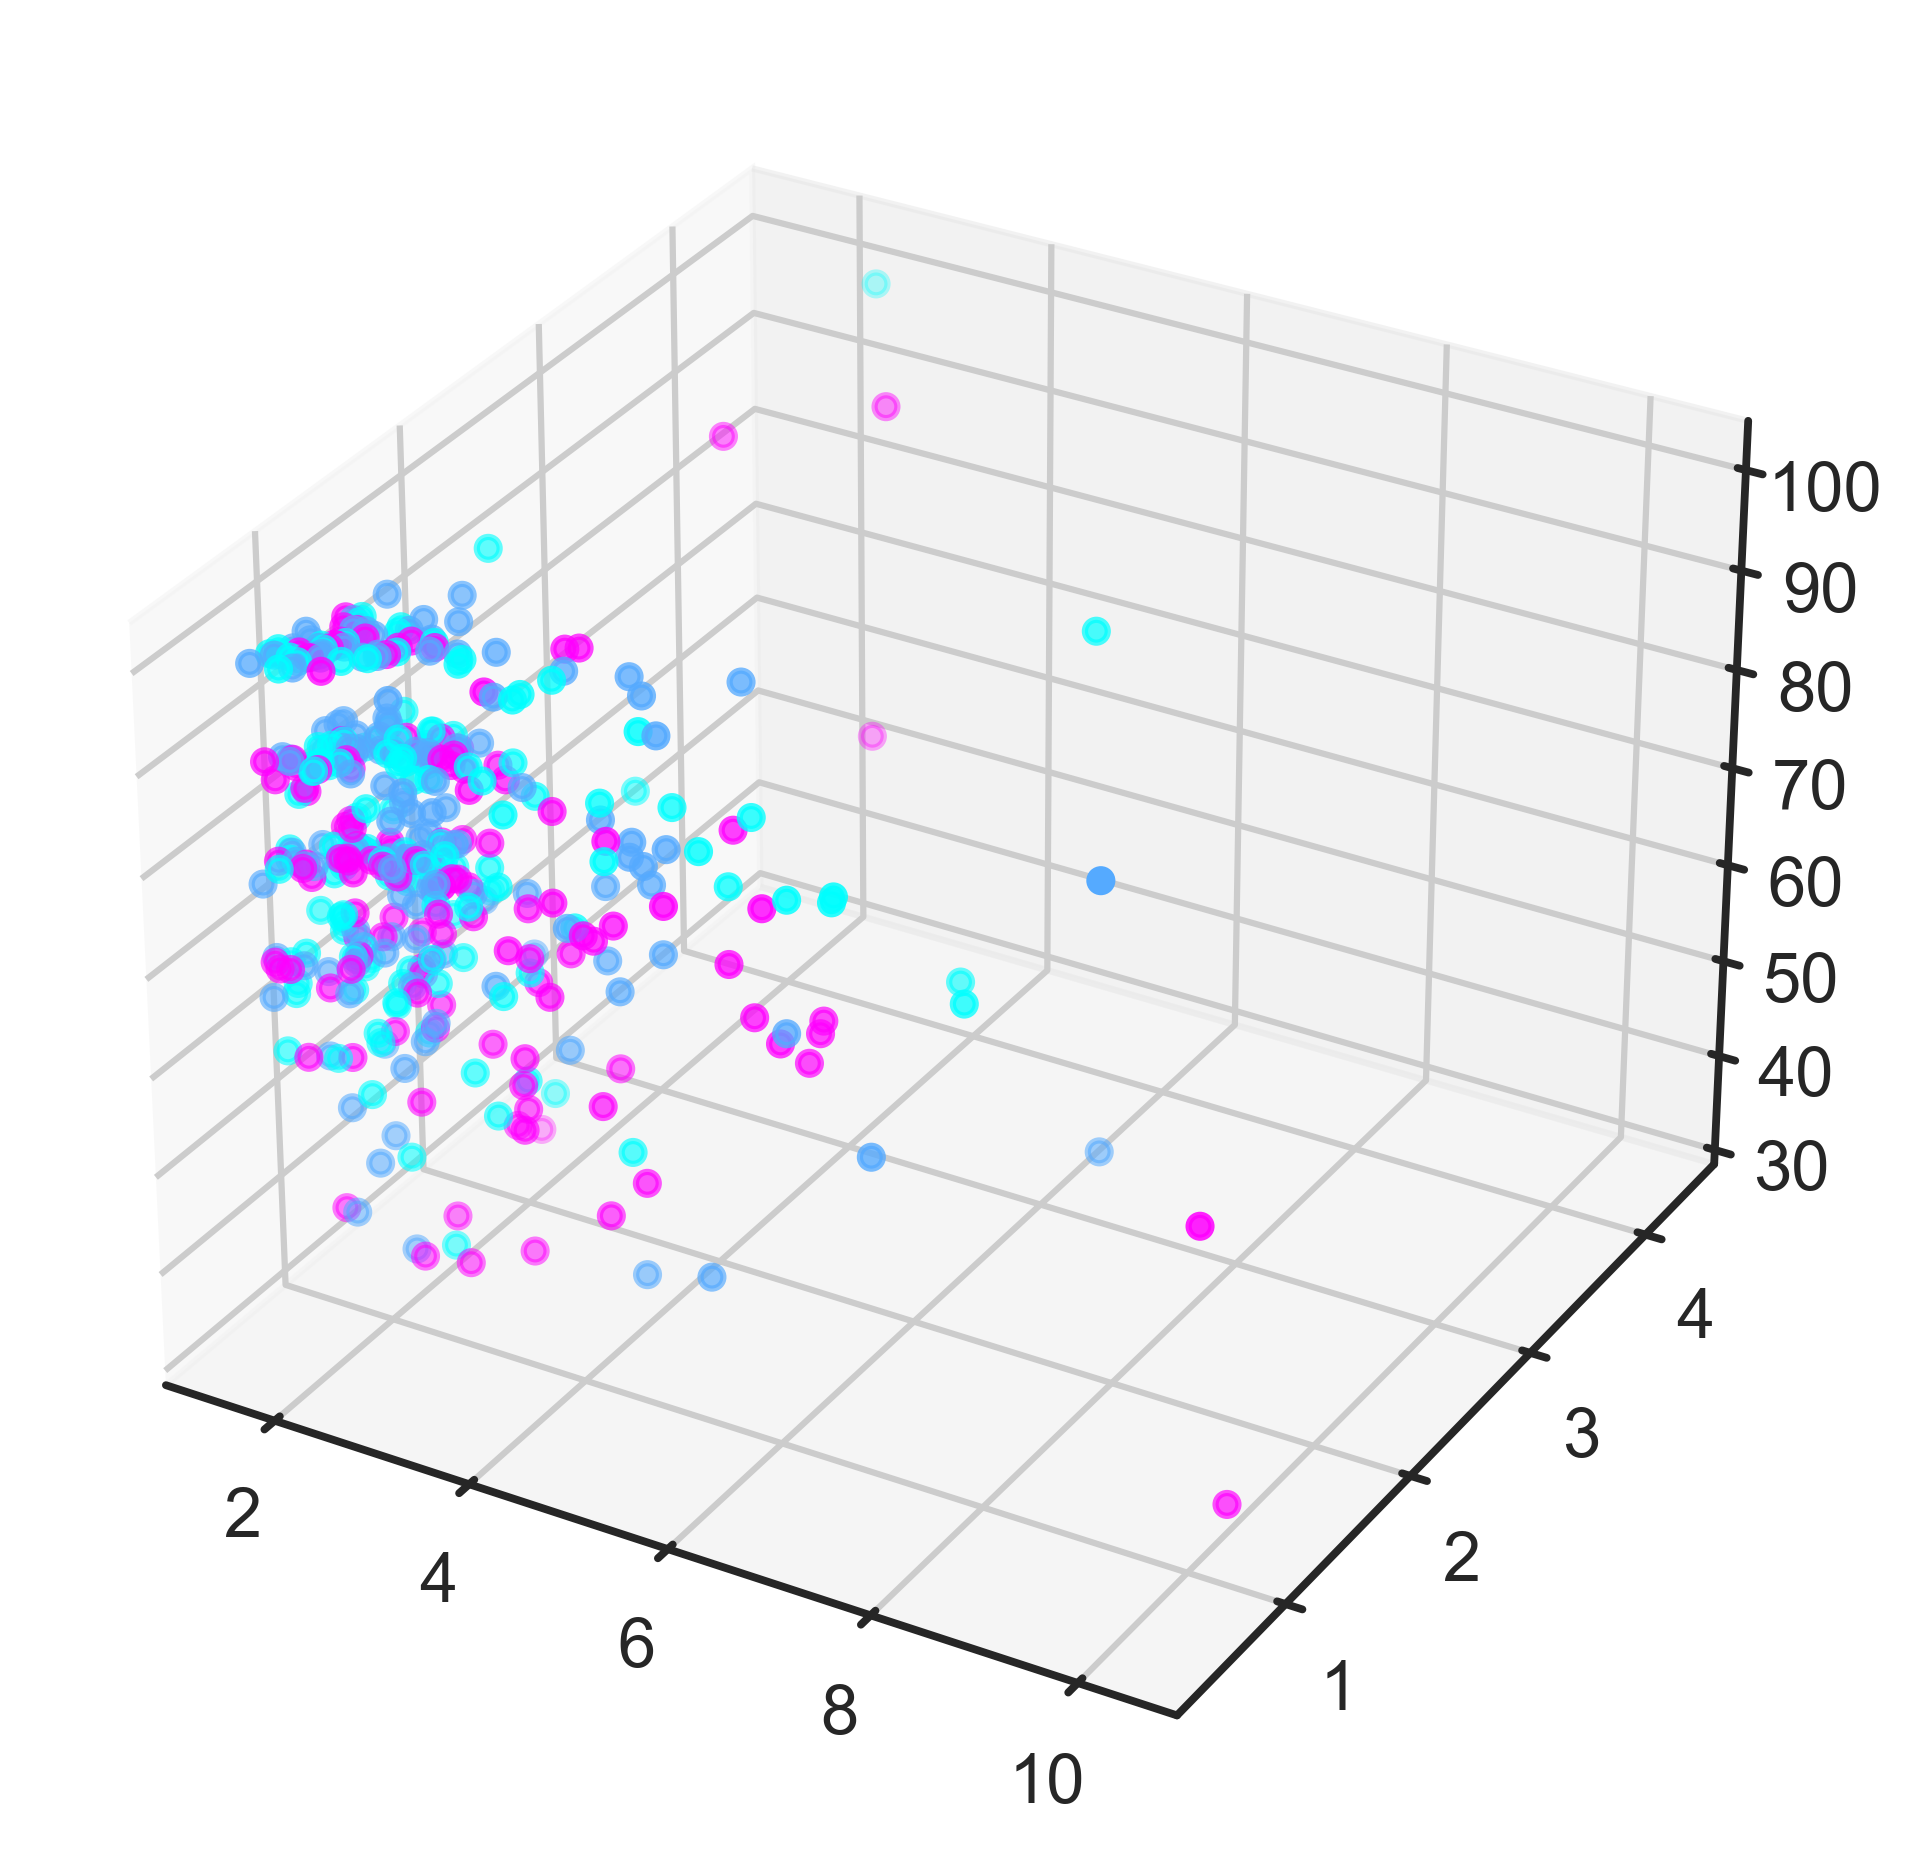

In [120]:
from mpl_toolkits.mplot3d import Axes3D
nphr=perfs_and_median_lats[(perfs_and_median_lats['group']=='NPHR')]

# axes instance
fig = plt.figure(figsize=(6,6), dpi=300)
ax = Axes3D(fig)

# plot
sc = ax.scatter(zs=nphr['performance'], 
                ys=nphr['median_time_in_cp'], 
                xs=nphr['median_latency_to_cp'],
                c=nphr['stim_condition'],
                cmap='cool', 
                s=30, marker='o')

#ax.set_ylabel('Performance')
#ax.set_xlim(30,100)
#ax.set_ylabel('Time in choice point')
#ax.set_ylim(0,5)
#ax.set_ylabel('Latency to choice point')
#ax.set_ylim(0,15)


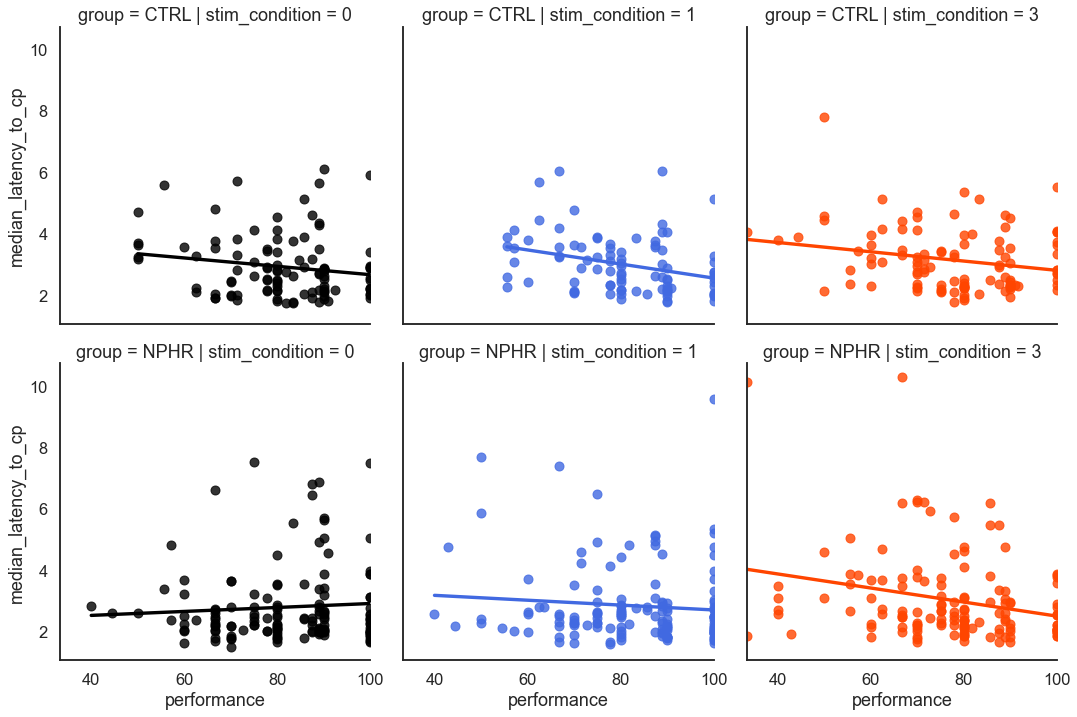

In [110]:
sns.lmplot(data=perfs_and_median_lats,
           col='stim_condition',
           row='group',
           x='performance',
           y='median_latency_to_cp',
           hue='stim_condition',
           palette=['black','royalblue','orangered'],
           ci=None)

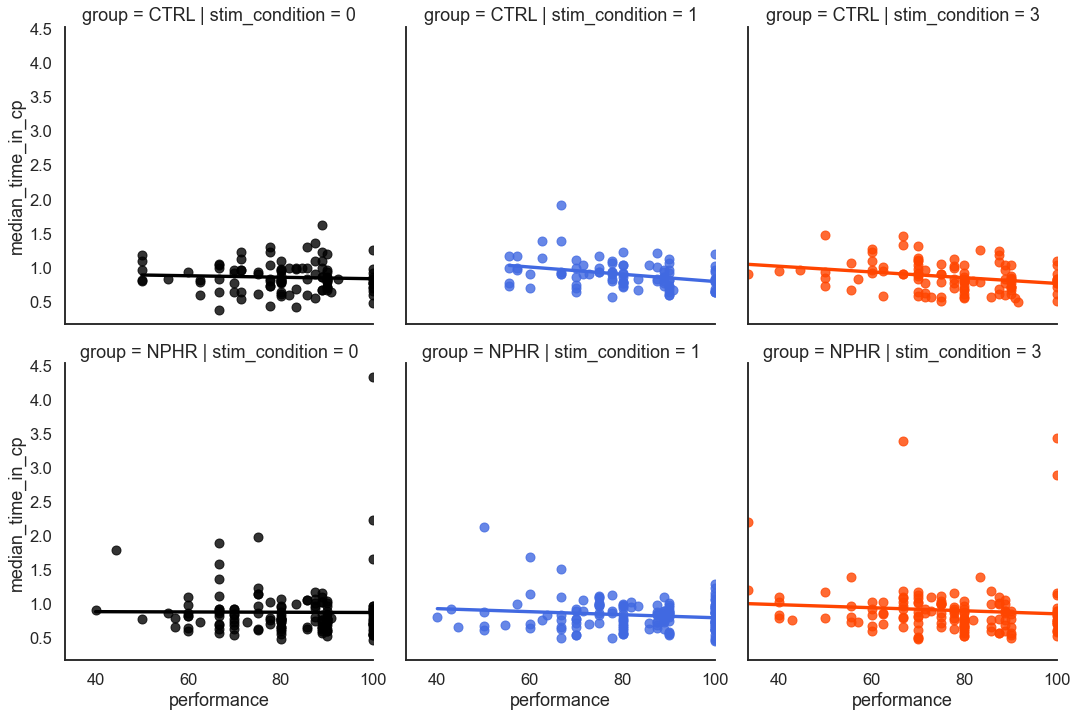

In [111]:
sns.lmplot(data=perfs_and_median_lats,
           col='stim_condition',
           row='group',
           x='performance',
           y='median_time_in_cp',
           hue='stim_condition',
           palette=['black','royalblue','orangered'],
           ci=None
          )